# Phone Price Predictor

## Problem

The Out-of-Limbo Corp has given me a contract to create a price predictor based on different features. So, they can choose which features to add to their latest Into-the-Limbo phone to maximize their profits.

## Data

To make sure my predictor works properly, I'm using a trusty dataset from Kaggle: [Phone Prices](https://www.kaggle.com/datasets/berkayeserr/phone-prices/data)

## Evaluation

Because phone prices vary based on the quality rather just the specs, the success of this model would be defined through an accuracy core of 0.85

## Features

**_X_**
- phone_name: name of the phone
- brand: brand of the phone
- os: operating system of the phone
- inches size of the phone screen as inches
- resolution: resolution of the phone screen
- battery: battery capacity of the phone
- battery_type: battery type of the phone
- ram(GB): ram of the phone as GB
- announcement_date: the date of the announcement of the phone
- weight(g): weight of the phone as gram
- storage(GB): storage capacity of the phone as GB
- video_720p: does phone camera has 720p feature
- video_1080p: does phone camera has 1080p feature
- video_4K: does phone camera has 4K feature
- video_8K: does phone camera has 8K feature
- video_30fps: does phone camera has 30fps feature
- video_60fps: does phone camera has 60fps feature
- video_120fps: does phone camera has 120fps feature
- video_240fps: does phone camera has 240fps feature
- video_480fps: does phone camera has 480fps feature
- video_960fps: does phone camera has 960fps feature

**_y_**
- price(USD): price of the phone as USD

In [1]:
# Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Reading the phone_prices.csv
phone_prices = pd.read_csv("phone_prices.csv")
phone_prices.head()

,phone_name,brand,os,inches,resolution,battery,battery_type,ram(GB),announcement_date,weight(g),...,video_1080p,video_4K,video_8K,video_30fps,video_60fps,video_120fps,video_240fps,video_480fps,video_960fps,price(USD)
0,Y6II Compact,Huawei,Android 5.1,5.0,720x1280,2200,Li-Po,2,2016-09-01,140.0,...,False,False,False,True,False,False,False,False,False,120.0
1,K20 plus,LG,Android 7.0,5.3,720x1280,2700,Li-Ion,2,2016-12-01,140.0,...,True,False,False,True,False,False,False,False,False,100.0
2,P8 Lite (2017),Huawei,Android 7.0,5.2,1080x1920,3000,Li-Ion,4,2017-01-01,147.0,...,True,False,False,True,False,False,False,False,False,420.0
3,Redmi Note 4,Xiaomi,Android 6.0,5.5,1080x1920,4100,Li-Po,4,2017-01-01,165.0,...,True,False,False,True,False,True,False,False,False,150.0
4,P10,Huawei,Android 7.0,5.1,1080x1920,3200,Li-Ion,4,2017-02-01,145.0,...,True,True,False,True,True,False,False,False,False,420.0


In [3]:
phone_prices.dtypes, len(phone_prices)

(phone_name            object
 brand                 object
 os                    object
 inches               float64
 resolution            object
 battery                int64
 battery_type          object
 ram(GB)                int64
 announcement_date     object
 weight(g)            float64
 storage(GB)            int64
 video_720p              bool
 video_1080p             bool
 video_4K                bool
 video_8K                bool
 video_30fps             bool
 video_60fps             bool
 video_120fps            bool
 video_240fps            bool
 video_480fps            bool
 video_960fps            bool
 price(USD)           float64
 dtype: object,
 1512)

In [4]:
phone_prices.describe()

,inches,battery,ram(GB),weight(g),storage(GB),price(USD)
count,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000
mean,6.422460,4389.798942,6.683862,187.636243,109.164683,337.847036
std,0.477043,784.607022,2.701433,26.200115,74.436484,266.740821
min,3.800000,1821.000000,1.000000,130.000000,1.000000,40.000000
25%,6.300000,4000.000000,4.000000,175.000000,64.000000,179.997500
50%,6.500000,4500.000000,8.000000,187.000000,128.000000,260.000000
75%,6.670000,5000.000000,8.000000,197.250000,128.000000,400.000000
max,10.400000,7250.000000,24.000000,500.000000,512.000000,2300.000000


In [5]:
phone_prices.index

RangeIndex(start=0, stop=1512, step=1)

### Exploratory Data Analysis (EDA)

The purpose of this analysis is to distill the most impactful features for a phone's price.

In [6]:
# Using a CyberPunk matplotlib style!
import mplcyberpunk

plt.style.use("cyberpunk")

In [7]:
# Global Function
def get_average_prices(class_col):
    """
    Returns a sorted dictionary of the ascending meadina price for each unique class in the given column,
    Key -> Class
    Value -> Price
    """
    raw_prices = {}
    for unique_class in phone_prices[class_col].unique():
        price = phone_prices[phone_prices[class_col] == unique_class]["price(USD)"].mean()
        raw_prices[price] = unique_class
    
    sorted_dict = {}
    sorted_keys = sorted(raw_prices)
    for sorted_key in sorted_keys:
        sorted_dict[raw_prices[sorted_key]] = sorted_key
    return sorted_dict

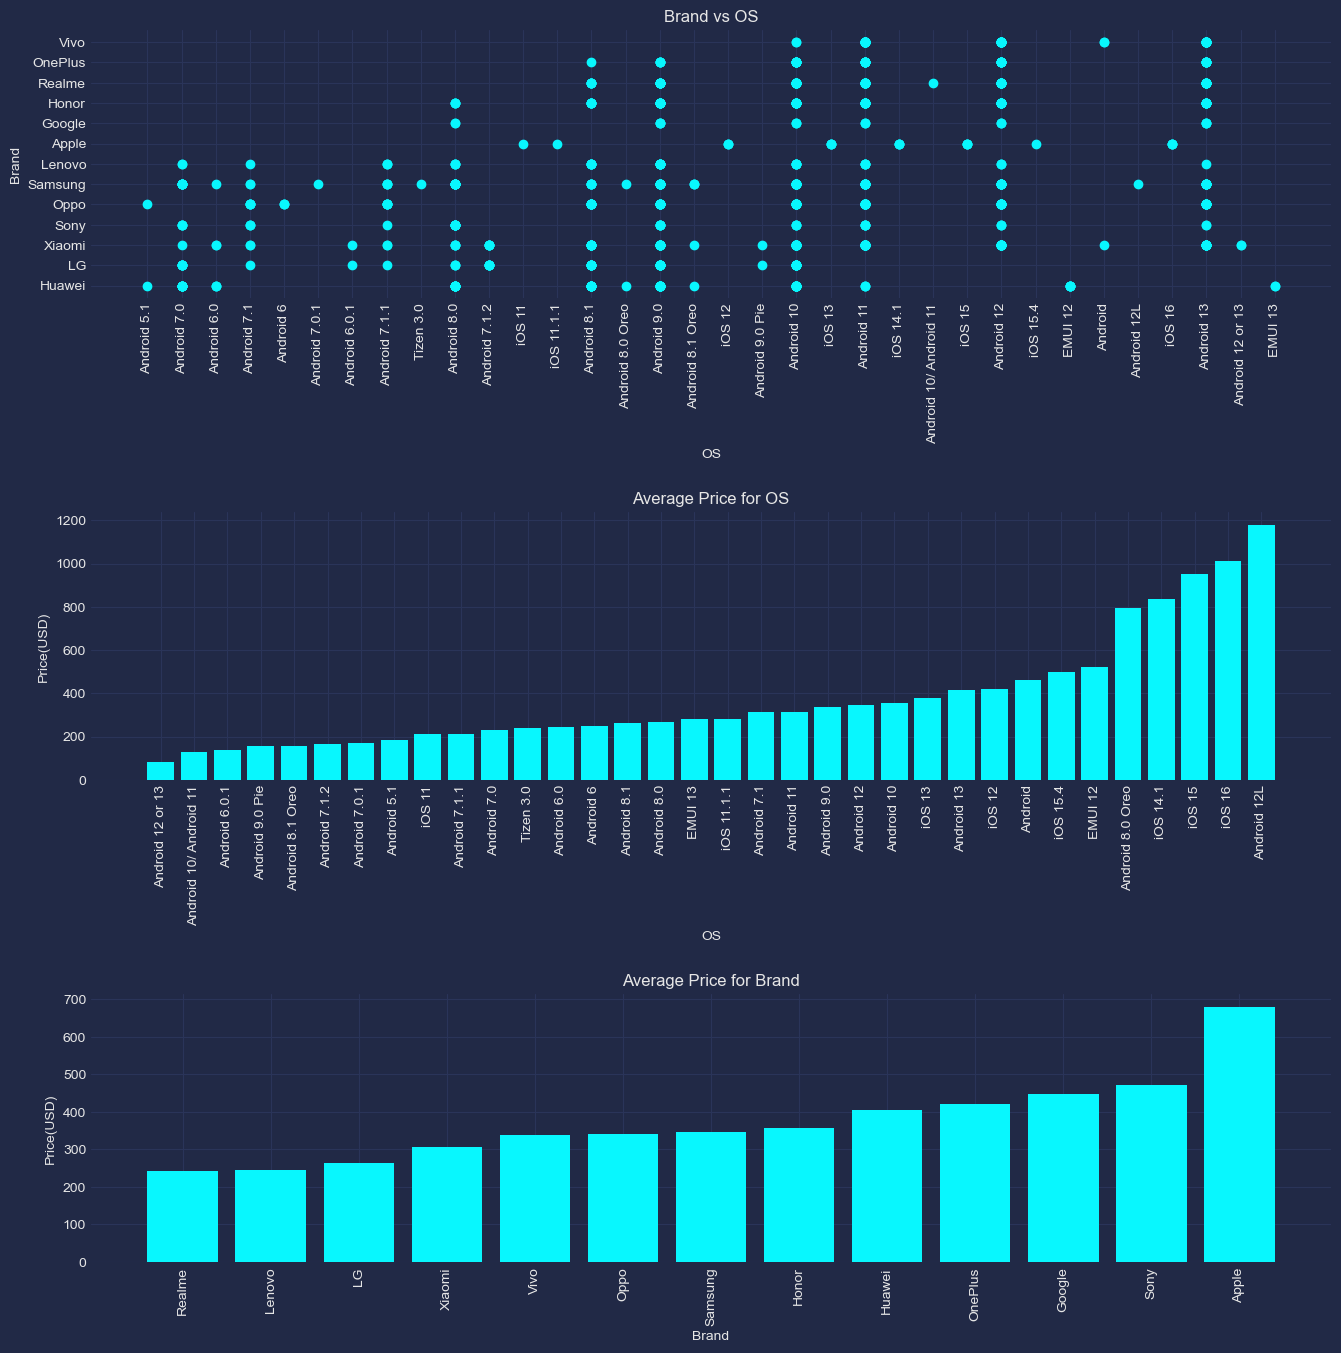

In [8]:
# Comparing the brand, OS and the price
fig, axs = plt.subplots(3, 1, figsize=(16, 16))
plt.subplots_adjust(hspace=0.8)

# Brand vs OS
axs[0].scatter(phone_prices["os"], phone_prices["brand"])
axs[0].set(title="Brand vs OS", xlabel="OS", ylabel="Brand")

# Average Price for each OS
average_os_prices = get_average_prices("os")
axs[1].bar(average_os_prices.keys(), average_os_prices.values())
axs[1].set(title="Average Price for OS", xlabel="OS", ylabel="Price(USD)")

# Average Price for each brand
average_brand_prices = get_average_prices("brand")
axs[2].bar(average_brand_prices.keys(), average_brand_prices.values())
axs[2].set(title="Average Price for Brand", xlabel="Brand", ylabel="Price(USD)")

# Global Modfication
for ax in axs:
    ax.tick_params(axis='x', rotation=90, labelsize=10)
    ax.tick_params(axis='y', labelsize=10);

Based on these results, we can see OS and brand affect the price a lot (especially in higher ends)!

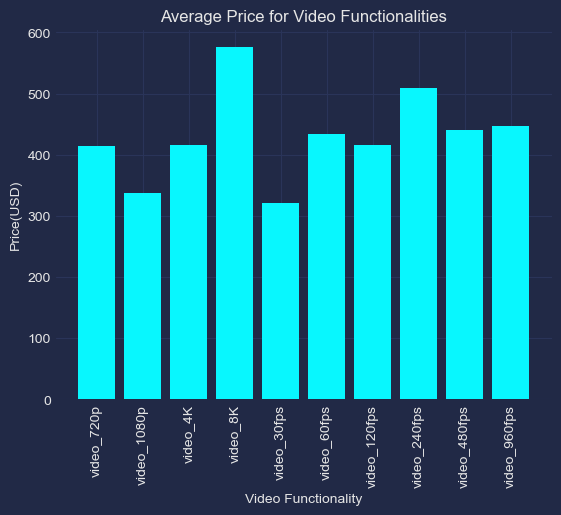

In [9]:
# Video Functionality and the price
video_funcs = [col for col in phone_prices.columns if phone_prices[col].dtype == "bool"]
video_func_avg_prices = []
for video_func in video_funcs:
    raw_average_prices = get_average_prices(video_func) 
    # This returns a dictionary with the average price when the functionality = 1 and 0.
    video_func_avg_prices.append(raw_average_prices[1])

fig, ax = plt.subplots(1, 1)
ax.bar(video_funcs, video_func_avg_prices)
ax.set(title="Average Price for Video Functionalities", xlabel="Video Functionality", ylabel="Price(USD)")

# Global Modfication
ax.tick_params(axis='x', rotation=90, labelsize=10)
ax.tick_params(axis='y', labelsize=10);

Quality of videos affect the price more than the FPS rate because to increase quality, more expensive cameras are required.\
So, it is quite safe to remove the columns specifying the video FPS functionalities.

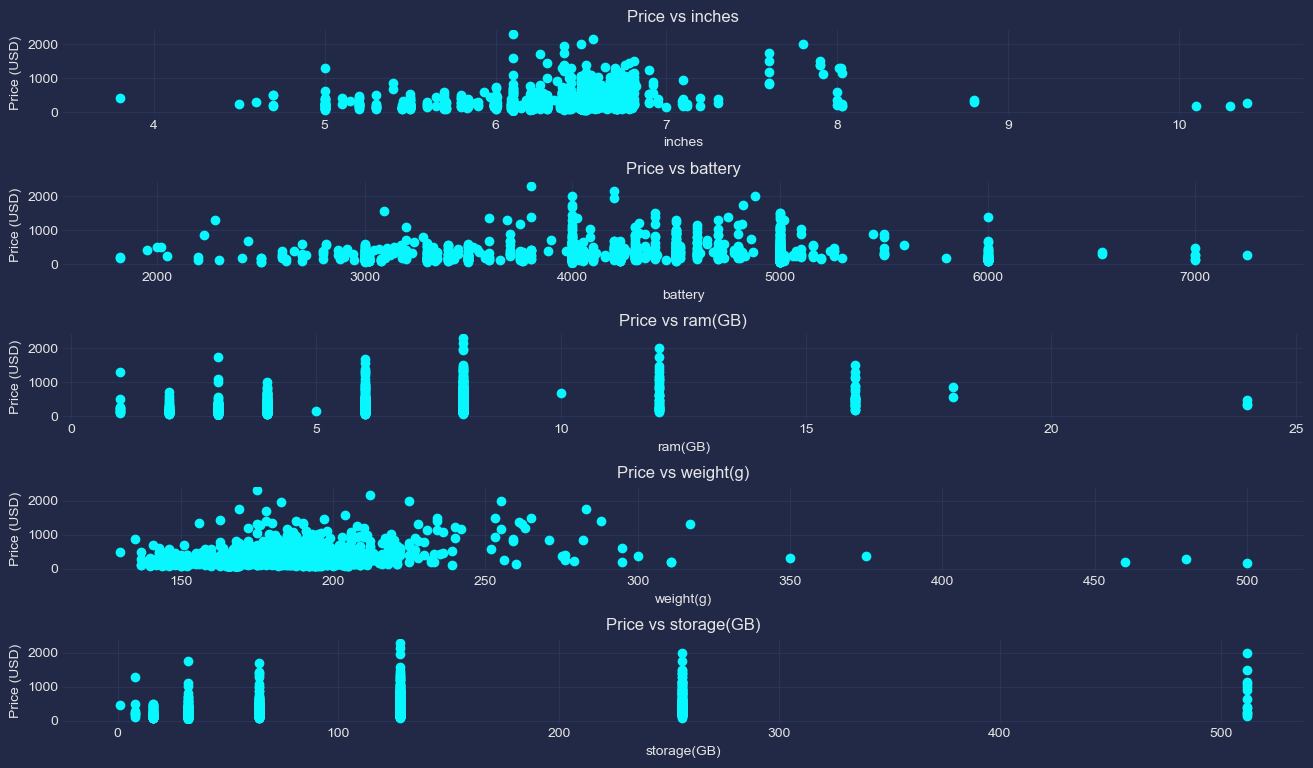

In [10]:
# Specs on Price

# Extracting Specs
specs = [col for col in phone_prices.columns if (phone_prices[col].dtype == "int64" or phone_prices[col].dtype == "float64") and col != "price(USD)"]

# Global Modifications
plt.figure(figsize=(16,9))
plt.subplots_adjust(hspace=0.8)

for i, spec in enumerate(specs):
    plt.subplot(len(specs), 1, i+1)
    plt.title(f"Price vs {spec}")
    plt.scatter(phone_prices[spec], phone_prices["price(USD)"])
    plt.xlabel(spec)
    plt.ylabel("Price (USD)")

The useful specs are;
1. Screen Size
2. Battery
3. RAM
4. Storage

Not that useful specs are;
1. Weight

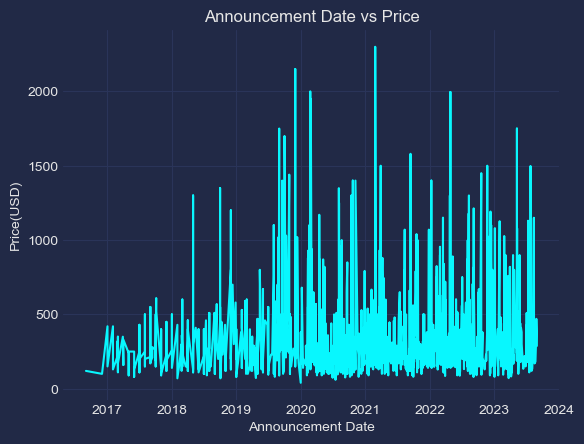

In [11]:
# Annoucement Date vs Price
plt.plot(pd.to_datetime(phone_prices["announcement_date"]), phone_prices["price(USD)"])
plt.title("Announcement Date vs Price")
plt.xlabel("Announcement Date")
plt.ylabel("Price(USD)");

So, the price fluctuates without much correlation due to the annoucement date. So, this is even an unnecessary feature!

### Getting the data ready

In [12]:
# Deleting the columns I have decided to delete through EDA
phone_prices.drop(columns=["weight(g)", "video_30fps", "video_60fps", "video_120fps", "video_240fps", "video_480fps", "video_960fps", "announcement_date"], inplace=True)

In [13]:
phone_prices.isna().sum()

phone_name      0
brand           0
os              0
inches          0
resolution      0
battery         0
battery_type    0
ram(GB)         0
storage(GB)     0
video_720p      0
video_1080p     0
video_4K        0
video_8K        0
price(USD)      0
dtype: int64

Because there are no missing values, we are safe to go without creating imputers!

In [14]:
X = phone_prices.drop(columns="price(USD)")
y = phone_prices["price(USD)"]

In [15]:
phone_prices.dtypes

phone_name       object
brand            object
os               object
inches          float64
resolution       object
battery           int64
battery_type     object
ram(GB)           int64
storage(GB)       int64
video_720p         bool
video_1080p        bool
video_4K           bool
video_8K           bool
price(USD)      float64
dtype: object

In [16]:
phone_prices.dtypes

phone_name       object
brand            object
os               object
inches          float64
resolution       object
battery           int64
battery_type     object
ram(GB)           int64
storage(GB)       int64
video_720p         bool
video_1080p        bool
video_4K           bool
video_8K           bool
price(USD)      float64
dtype: object

Now, let's convert object-types to numerical through one hot encoding. To do that, we need only object columns.\
Even though the above datatypes specify object, there can be ints (especially in phone_name cuz there are numbers). So, we are converting all of them into strings;

In [17]:
# Making object columns 100% objects
object_cols = [col for col in phone_prices.columns if phone_prices[col].dtype == "object"]
for object_col in object_cols:
    phone_prices[object_col].apply(str)

In [18]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = [col for col in phone_prices.columns if phone_prices[col].dtype == "object"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer(
    [("one_hot_encoding", one_hot, categorical_features)],
    remainder = "passthrough"
)

X = transformer.fit_transform(X)